In [5]:

def knn_iter(X,centroids):
    labels = []
    for x in X:
        distances=[]

In [9]:
initial_indices

array([0, 1])

In [16]:
np.linalg.norm(X[:,None]-centroids,axis=2)

array([[12.80624847,  1.        ],
       [12.72792206,  1.        ],
       [10.63014581,  1.41421356],
       [ 1.        , 11.3137085 ],
       [ 1.        , 12.72792206],
       [ 1.41421356, 12.20655562]])

K-Means Clustering Step by Step
Converged at iteration 3


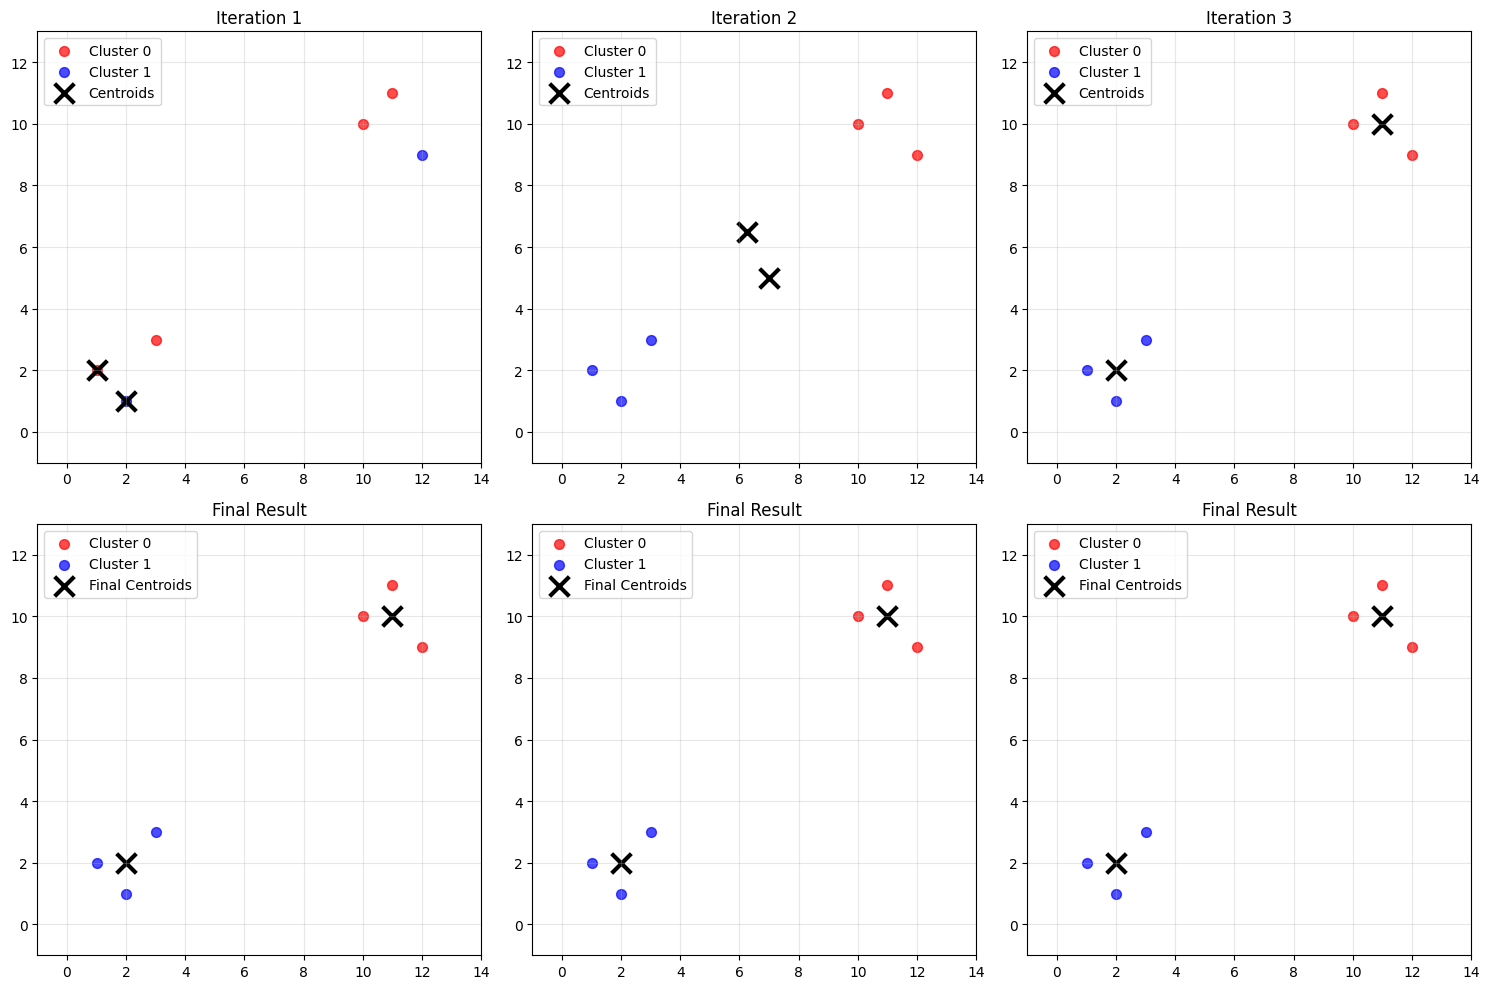


Final centroids:
Cluster 0: (11.00, 10.00)
Cluster 1: (2.00, 2.00)


In [4]:
# Enable matplotlib inline display
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# 初始化数据
X = np.array([
    [1, 2], [2, 1], [3, 3],
    [10, 10], [11, 11], [12, 9]
])
k = 2
max_iter = 5

# 初始化质心
np.random.seed(42)
initial_indices = np.random.choice(len(X), k, replace=False)
centroids = X[initial_indices].copy()

print("K-Means Clustering Step by Step")
print("=" * 40)

colors = ['red', 'blue', 'green']

# Create subplots for step-by-step visualization
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for iteration in range(max_iter):
    # Calculate distances and assign clusters
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    labels = np.argmin(distances, axis=1)
    
    # Plot current state
    ax = axes[iteration]
    
    # Plot data points with cluster colors
    for i in range(k):
        cluster_points = X[labels == i]
        if len(cluster_points) > 0:
            ax.scatter(cluster_points[:, 0], cluster_points[:, 1], 
                      c=colors[i], label=f'Cluster {i}', s=50, alpha=0.7)
    
    # Plot centroids
    ax.scatter(centroids[:, 0], centroids[:, 1], 
              c='black', marker='x', s=200, linewidths=3, label='Centroids')
    
    ax.set_title(f"Iteration {iteration + 1}")
    ax.legend()
    ax.grid(True, alpha=0.3)
    ax.set_xlim(-1, 14)
    ax.set_ylim(-1, 13)
    
    # Update centroids for next iteration
    new_centroids = np.array([X[labels == i].mean(axis=0) if np.sum(labels == i) > 0 else centroids[i] for i in range(k)])
    
    # Check for convergence
    if np.allclose(centroids, new_centroids):
        print(f"Converged at iteration {iteration + 1}")
        # Fill remaining subplots with the final result
        for j in range(iteration + 1, len(axes)):
            axes[j].scatter(X[labels == 0][:, 0], X[labels == 0][:, 1], 
                          c=colors[0], label='Cluster 0', s=50, alpha=0.7)
            axes[j].scatter(X[labels == 1][:, 0], X[labels == 1][:, 1], 
                          c=colors[1], label='Cluster 1', s=50, alpha=0.7)
            axes[j].scatter(new_centroids[:, 0], new_centroids[:, 1], 
                          c='black', marker='x', s=200, linewidths=3, label='Final Centroids')
            axes[j].set_title("Final Result")
            axes[j].legend()
            axes[j].grid(True, alpha=0.3)
            axes[j].set_xlim(-1, 14)
            axes[j].set_ylim(-1, 13)
        break
    
    centroids = new_centroids

plt.tight_layout()
plt.show()

# Print final results
print(f"\nFinal centroids:")
for i, centroid in enumerate(centroids):
    print(f"Cluster {i}: ({centroid[0]:.2f}, {centroid[1]:.2f})")

In [ ]:
# Detailed explanation of np.linalg.norm and np.newaxis
import numpy as np

print("=== Understanding np.newaxis and np.linalg.norm ===\n")

# Sample data
X = np.array([[1, 2], [2, 1], [3, 3]])  # 3 points, 2 features each
centroids = np.array([[1.5, 1.5], [2.5, 2.5]])  # 2 centroids

print("Data points X:")
print(f"Shape: {X.shape}")
print(X)

print(f"\nCentroids:")
print(f"Shape: {centroids.shape}")
print(centroids)

# Step 1: Add new axis to X
X_expanded = X[:, np.newaxis]  # Shape becomes (3, 1, 2)
print(f"\nX[:, np.newaxis] shape: {X_expanded.shape}")
print("This creates a new dimension for broadcasting")

# Step 2: Broadcasting subtraction
diff = X_expanded - centroids  # Broadcasting: (3, 1, 2) - (2, 2) = (3, 2, 2)
print(f"\nDifference array shape: {diff.shape}")
print("Each element diff[i, j] is the vector from centroid j to point i")

# Step 3: Calculate distances using norm
distances = np.linalg.norm(diff, axis=2)  # Shape: (3, 2)
print(f"\nDistances shape: {distances.shape}")
print("distances[i, j] = distance from point i to centroid j")
print("Distances matrix:")
print(distances)

# Verify with manual calculation
print("\n=== Manual verification ===")
for i, point in enumerate(X):
    for j, centroid in enumerate(centroids):
        manual_dist = np.sqrt(np.sum((point - centroid)**2))
        auto_dist = distances[i, j]
        print(f"Point {i} to Centroid {j}: Manual={manual_dist:.3f}, Auto={auto_dist:.3f}")

# Step 4: Find closest centroid for each point
labels = np.argmin(distances, axis=1)
print(f"\nClosest centroid for each point: {labels}")

print("\n" + "="*50)
print("Key insights:")
print("• np.newaxis adds a dimension for broadcasting")
print("• np.linalg.norm(array, axis=2) computes L2 norm along axis 2") 
print("• Broadcasting allows vectorized distance calculation")
print("• Result: distances[i,j] = distance from point i to centroid j")
